In [732]:
import pandas as pd 
from unidecode import unidecode
import numpy as np
import seaborn as sns

In [733]:
# !head -n 5 "../data/raw/houses_to_rent_v2.csv"

In [734]:
class DataCleaning:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    def removing_columns(self, aditional_columns):
        """
        Remove colunas adicionais especificadas no DataFrame e retorna o DataFrame modificado.

        :param colunas_adicionais: Lista de nomes de colunas adicionais para remover.
        """
        modified_dataframe = self.dataframe.copy()
        
        modified_dataframe = self.dataframe.drop(columns = aditional_columns, errors = "ignore")
        
        self.dataframe = modified_dataframe
    
    def removing_accents(self):
        """
        Remove acentos de todas as colunas de texto no DataFrame.
        """
        modified_dataframe = self.dataframe.copy()
        # Itera sobre as colunas do dataframe
        for column in modified_dataframe.columns:
            # Verifica se a coluna contém texto (tipo "object")
            if (modified_dataframe[column].dtype == "object"):
                # Remove acentos dos valores, verificando se é uma string antes
                modified_dataframe[column] = modified_dataframe[column].apply(
                    lambda x: unidecode(x) if isinstance(x, str) else x
                )
        self.dataframe = modified_dataframe
        
    def rename_columns(self, column_mapping):
        """
        Renomeia as colunas do DataFrame de acordo com o mapeamento especificado.

        :param column_mapping: Dicionário onde as chaves são os nomes atuais das colunas
                               e os valores são os novos nomes desejados.
        """
        modified_dataframe = self.dataframe.rename(columns=column_mapping)
        modified_dataframe.columns = modified_dataframe.columns.str.upper()  # Converte para maiúsculas
        self.dataframe = modified_dataframe

    def transform_column_to_int32(self, column_name, value_mapping=None, default_value=None):
        """
        Transforma uma coluna do DataFrame para tipo int32, substituindo valores conforme o mapeamento.

        :param column_name: Nome da coluna a ser transformada.
        :param value_mapping: Dicionário de mapeamento de valores. Se não fornecido, a coluna será convertida diretamente.
        :param default_value: Valor padrão a ser usado para substituir valores não mapeados. Se não fornecido, mantém os valores originais.
        """
        modified_dataframe = self.dataframe.copy()

        if value_mapping:
            modified_dataframe[column_name] = modified_dataframe[column_name].map(value_mapping)
            if default_value is not None:
                modified_dataframe[column_name].fillna(default_value, inplace=True)

        # Tratar o caso de '-' e '<NA>' antes de tentar a conversão
        modified_dataframe[column_name] = modified_dataframe[column_name].replace(['-', '<NA>'], default_value)
        
        # Corrigir a conversão para int32
        modified_dataframe[column_name] = modified_dataframe[column_name].astype('Int32')
        modified_dataframe = modified_dataframe.dropna(subset=[column_name])
        self.dataframe = modified_dataframe
        
    def drop_duplicates(self):
        """
        Remove duplicatas do DataFrame.
        """
        modified_dataframe = self.dataframe.drop_duplicates()
        self.dataframe = modified_dataframe
        
    def arrange_columns(self, columns_to_arrange):
        """
        Organiza as linhas do DataFrame com base nos valores das colunas especificadas.

        :param columns_to_arrange: Lista de nomes das colunas pelas quais deseja organizar o DataFrame.
        """
        if all(coluna in self.dataframe.columns for coluna in columns_to_arrange):
            modified_dataframe = self.dataframe.copy()
            modified_dataframe.sort_values(by=columns_to_arrange, inplace=True)
            self.dataframe = modified_dataframe
        else:
            colunas_faltando = [coluna for coluna in columns_to_arrange if coluna not in self.dataframe.columns]
            print(f'Uma ou mais colunas ({", ".join(colunas_faltando)}) não existem no DataFrame.')

    def save_to_csv(self, filename):
        """
        Salva o DataFrame em um arquivo CSV.
        
        :param nome_arquivo: Nome do arquivo CSV de saída.
        """
        self.dataframe.to_csv(filename, index = False)
        
    def getting_modified_dataframe(self):
        """
        Retorna o DataFrame modificado após todas as operações de limpeza.
        """
        return self.dataframe

In [735]:
# Carregar o arquivo CSV em um DataFrame
caminho_arquivo_csv = '../data/raw/houses_to_rent_v2.csv'
dataframe = pd.read_csv(caminho_arquivo_csv, sep=",", encoding="UTF-8")

# Criar uma instância da classe DataCleaning com o DataFrame
limpeza = DataCleaning(dataframe)

# Dicionário de mapeamento para renomear as colunas
colunas_renomear = {
    'city': 'city',
    'area': 'area',
    'rooms': 'rooms',
    'bathroom': 'bathroom',
    'parking spaces': 'parking_spaces',
    'floor': 'floor',
    'animal': 'animal',
    'furniture': 'furniture',
    'hoa (R$)': 'hoa_(R$)',
    'rent amount (R$)': 'rent_amount_(R$)',
    'property tax (R$)': 'property_tax_(R$)',
    'fire insurance (R$)': 'fire_insurance_(R$)',
    'total (R$)': 'total_(R$)'
}


limpeza.drop_duplicates()

# Chamando o método para renomear colunas
limpeza.rename_columns(colunas_renomear)

# Transforma a coluna 'floor' para tipo int32, substituindo valores '-' por 0.
limpeza.transform_column_to_int32('FLOOR')

# Transforma a coluna 'animal' para tipo int32, mapeando valores 'acept' para 1 e 'not acept' para 0.
limpeza.transform_column_to_int32('ANIMAL', {'acept': 1, 'not acept': 0})

# Transforma a coluna 'furniture' para tipo int32, mapeando valores 'furnished' para 1 e 'not furnished' para 0.
limpeza.transform_column_to_int32('FURNITURE', {'furnished': 1, 'not furnished': 0})

dataframe_modificado = limpeza.getting_modified_dataframe()

# Salvar o DataFrame limpo como um novo arquivo CSV
nome_arquivo_saida = '../data/processed/houses_to_rent_v2_processed.csv'
limpeza.save_to_csv(nome_arquivo_saida)

In [736]:
dataframe_modificado.dtypes

CITY                   object
AREA                    int64
ROOMS                   int64
BATHROOM                int64
PARKING_SPACES          int64
FLOOR                   Int32
ANIMAL                  Int32
FURNITURE               Int32
HOA_(R$)                int64
RENT_AMOUNT_(R$)        int64
PROPERTY_TAX_(R$)       int64
FIRE_INSURANCE_(R$)     int64
TOTAL_(R$)              int64
dtype: object

In [751]:
dataframe_modificado.head(30)

,CITY,AREA,ROOMS,BATHROOM,PARKING_SPACES,FLOOR,ANIMAL,FURNITURE,HOA_(R$),RENT_AMOUNT_(R$),PROPERTY_TAX_(R$),FIRE_INSURANCE_(R$),TOTAL_(R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,1,0,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,1,1,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,1,1,590,2300,35,30,2955
10,São Paulo,26,1,1,0,2,1,1,470,2100,150,27,2747


In [752]:
#### Verificando a forma dos dados.
dataframe_modificado.shape

(7963, 13)

In [753]:
dataframe_modificado["CITY"].value_counts()

São Paulo         4157
Rio de Janeiro    1339
Porto Alegre       963
Belo Horizonte     878
Campinas           626
Name: CITY, dtype: int64

In [754]:
cities = dataframe_modificado['CITY'].unique()
print(cities)

['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']


In [755]:
#### Verificando as informações dos atributos.
dataframe_modificado.describe()

,AREA,ROOMS,BATHROOM,PARKING_SPACES,FLOOR,ANIMAL,FURNITURE,HOA_(R$),RENT_AMOUNT_(R$),PROPERTY_TAX_(R$),FIRE_INSURANCE_(R$),TOTAL_(R$)
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.0,7963.0,7963.0,7.963000e+03,7963.000000,7963.000000,7963.000000,7.963000e+03
mean,126.897903,2.368203,2.086400,1.388547,6.619741,0.770941,0.273766,1.376190e+03,3637.493533,353.787141,47.151702,5.414854e+03
std,610.886172,1.027530,1.263091,1.244623,6.142356,0.420254,0.445918,1.302011e+04,3167.721710,3570.161057,40.535307,1.419882e+04
min,11.000000,1.000000,1.000000,0.000000,1.0,0.0,0.0,0.000000e+00,460.000000,0.000000,3.000000,5.070000e+02
25%,55.000000,2.000000,1.000000,1.000000,3.0,1.0,0.0,4.300000e+02,1500.000000,38.000000,20.000000,2.116500e+03
50%,80.000000,2.000000,2.000000,1.000000,5.0,1.0,0.0,7.700000e+02,2500.000000,117.000000,33.000000,3.535000e+03
75%,146.000000,3.000000,3.000000,2.000000,9.0,1.0,1.0,1.573500e+03,4500.000000,340.000000,58.000000,6.539500e+03
max,46335.000000,7.000000,9.000000,8.000000,301.0,1.0,1.0,1.117000e+06,24000.000000,313700.000000,305.000000,1.120000e+06


In [756]:
#### Verificando as informações dos atributos.
dataframe_modificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CITY                 7963 non-null   object
 1   AREA                 7963 non-null   int64 
 2   ROOMS                7963 non-null   int64 
 3   BATHROOM             7963 non-null   int64 
 4   PARKING_SPACES       7963 non-null   int64 
 5   FLOOR                7963 non-null   Int32 
 6   ANIMAL               7963 non-null   Int32 
 7   FURNITURE            7963 non-null   Int32 
 8   HOA_(R$)             7963 non-null   int64 
 9   RENT_AMOUNT_(R$)     7963 non-null   int64 
 10  PROPERTY_TAX_(R$)    7963 non-null   int64 
 11  FIRE_INSURANCE_(R$)  7963 non-null   int64 
 12  TOTAL_(R$)           7963 non-null   int64 
dtypes: Int32(3), int64(9), object(1)
memory usage: 801.0+ KB


In [757]:
#### Listando registros missing por atributo.
dataframe_modificado.isnull().sum()

CITY                   0
AREA                   0
ROOMS                  0
BATHROOM               0
PARKING_SPACES         0
FLOOR                  0
ANIMAL                 0
FURNITURE              0
HOA_(R$)               0
RENT_AMOUNT_(R$)       0
PROPERTY_TAX_(R$)      0
FIRE_INSURANCE_(R$)    0
TOTAL_(R$)             0
dtype: int64

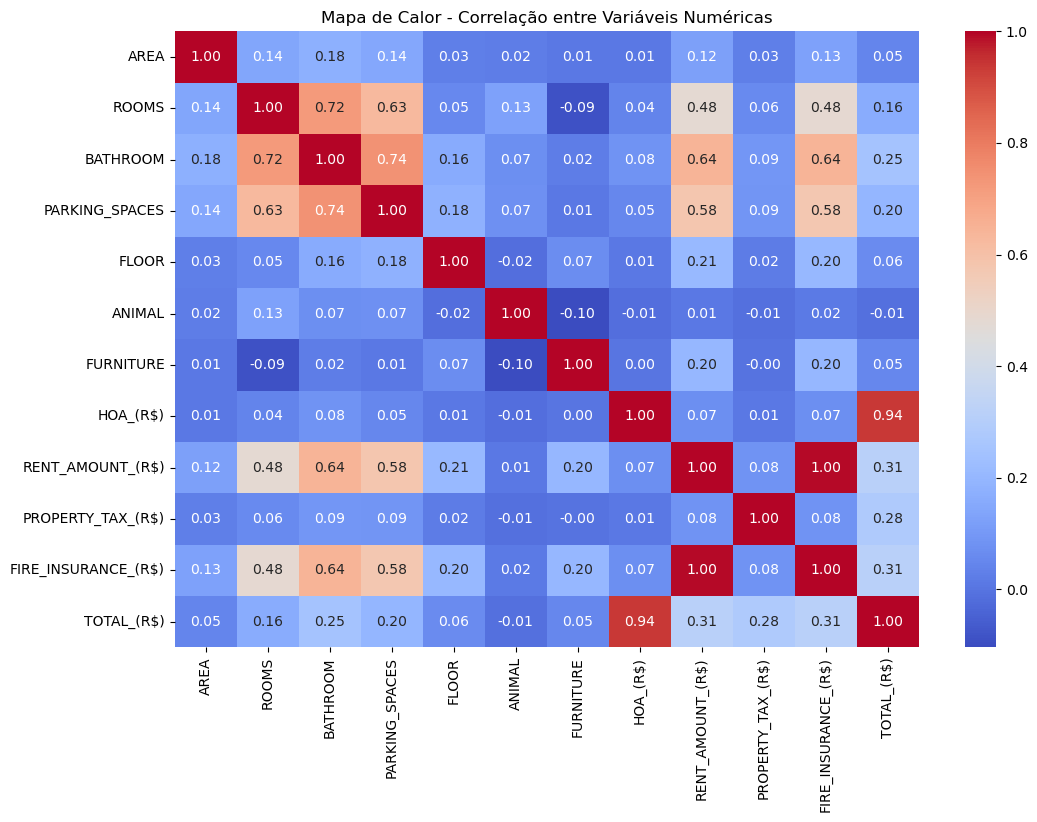

In [758]:
import sys
from pathlib import Path

# Procura o diretório raiz do projeto com o sys.path
sys.path.append(str(Path.cwd().parent))

from src.visualization.visualize import DataVisualization

data_visualization = DataVisualization()

# boxplot_columns = ["YEAR"]

# for coluna in boxplot_columns:
#     data_visualization.boxplot_plot(dataframe_modificado, coluna)
    
data_visualization.plotar_heatmap(dataframe_modificado)

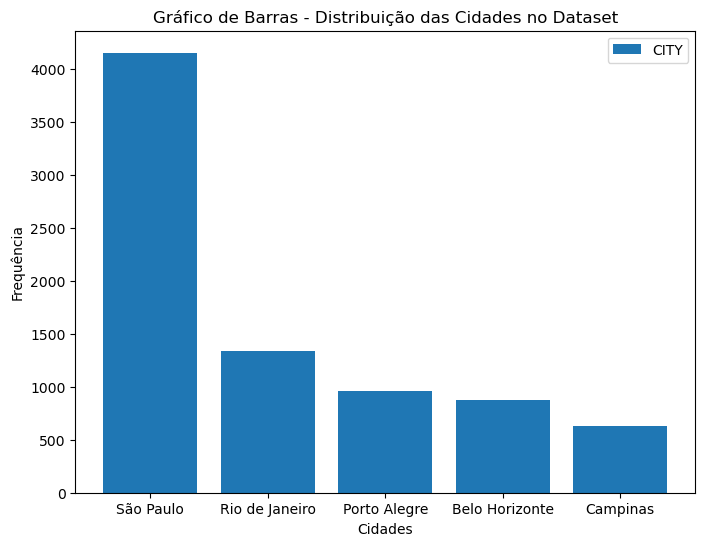

In [759]:
coluna_plot_bar = ["CITY"]
data_visualization.plot_bar_chart(dataframe_modificado,
                                  coluna_plot_bar,
                                  "Cidades",
                                  "Frequência",
                                  "Gráfico de Barras - Distribuição das Cidades no Dataset")

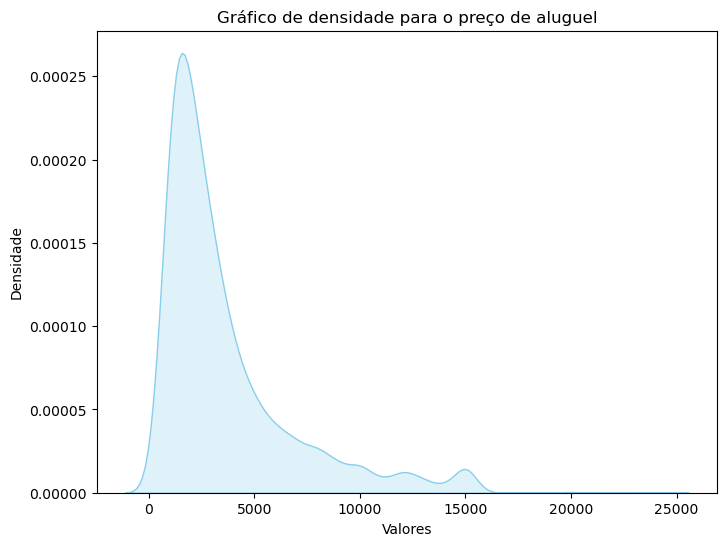

In [760]:
data_visualization.plot_density_plot(dataframe_modificado,
                                     'RENT_AMOUNT_(R$)',
                                     titulo='Gráfico de densidade para o preço de aluguel'
                                     )

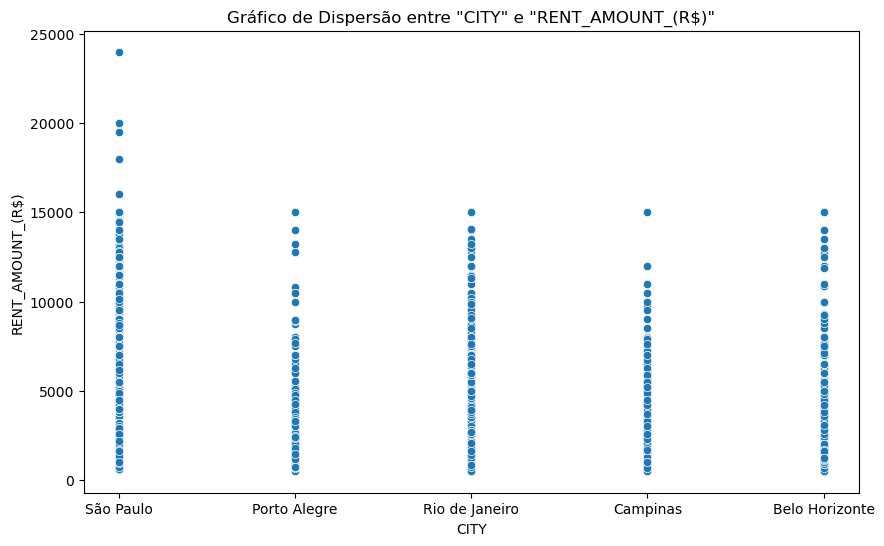

In [761]:
data_visualization.plotar_dispersao(dataframe_modificado, "CITY", "RENT_AMOUNT_(R$)")

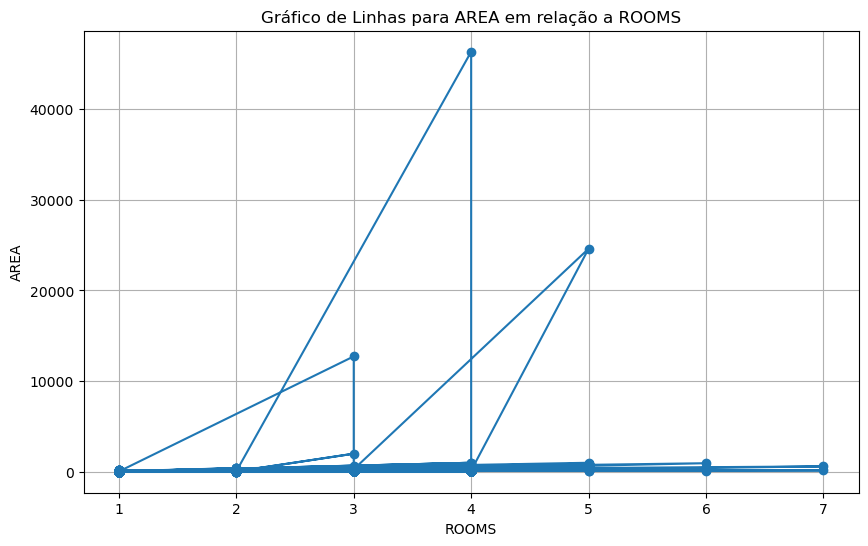

In [762]:
data_visualization.plotar_grafico_linhas(dataframe_modificado, "ROOMS", "AREA")